In [ ]:
pip install tensorflow pandas numpy scikit-learn streamlit requests

In [52]:
pip install seaborn


python3(6099) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping

In [8]:
# Load dataset (replace with actual data or synthetic data)
df = pd.read_csv('../data/synthetic_cognitive_health_air_quality_data.csv')

In [10]:

# Features and target (predicting cognitive health score)
X = df.drop(columns=['Cognitive_Health_Score'])
y = df['Cognitive_Health_Score']


In [12]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression MSE: {lr_mse:.4f}")
print(f"Linear Regression R²: {lr_r2:.4f}")

# Save the model
joblib.dump(lr_model, 'lr_model.pkl')


Linear Regression MSE: 4.3455
Linear Regression R²: 0.9807


['lr_model.pkl']

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest Regressor MSE: {rf_mse:.4f}")
print(f"Random Forest Regressor R²: {rf_r2:.4f}")

# Save the model
joblib.dump(rf_model, 'rf_model.pkl')


Random Forest Regressor MSE: 10.3065
Random Forest Regressor R²: 0.9543


['rf_model.pkl']

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Create and train the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print(f"Gradient Boosting Regressor MSE: {gb_mse:.4f}")
print(f"Gradient Boosting Regressor R²: {gb_r2:.4f}")

# Save the model
joblib.dump(gb_model, 'gb_model.pkl')


Gradient Boosting Regressor MSE: 5.6641
Gradient Boosting Regressor R²: 0.9749


['gb_model.pkl']

In [22]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Create and train the model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Predict and evaluate
svr_pred = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
print(f"Support Vector Regressor MSE: {svr_mse:.4f}")
print(f"Support Vector Regressor R²: {svr_r2:.4f}")

# Save the model
joblib.dump(svr_model, 'svr_model.pkl')


Support Vector Regressor MSE: 2.5437
Support Vector Regressor R²: 0.9887


['svr_model.pkl']

In [24]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Create and train the model
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)

# Predict and evaluate
nn_pred = nn_model.predict(X_test_scaled)
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)
print(f"Neural Network MSE: {nn_mse:.4f}")
print(f"Neural Network R²: {nn_r2:.4f}")

# Save the model
joblib.dump(nn_model, 'nn_model.pkl')


Neural Network MSE: 0.1162
Neural Network R²: 0.9995


/Users/vineetchanne/Desktop/CV PROJECTS/airquality/air/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


['nn_model.pkl']

In [26]:
# Create a dictionary to store MSE and R² for each model
model_comparisons = {
    'Linear Regression': {'MSE': lr_mse, 'R²': lr_r2},
    'Random Forest': {'MSE': rf_mse, 'R²': rf_r2},
    'Gradient Boosting': {'MSE': gb_mse, 'R²': gb_r2},
    'SVR': {'MSE': svr_mse, 'R²': svr_r2},
    'Neural Network': {'MSE': nn_mse, 'R²': nn_r2}
}


In [54]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

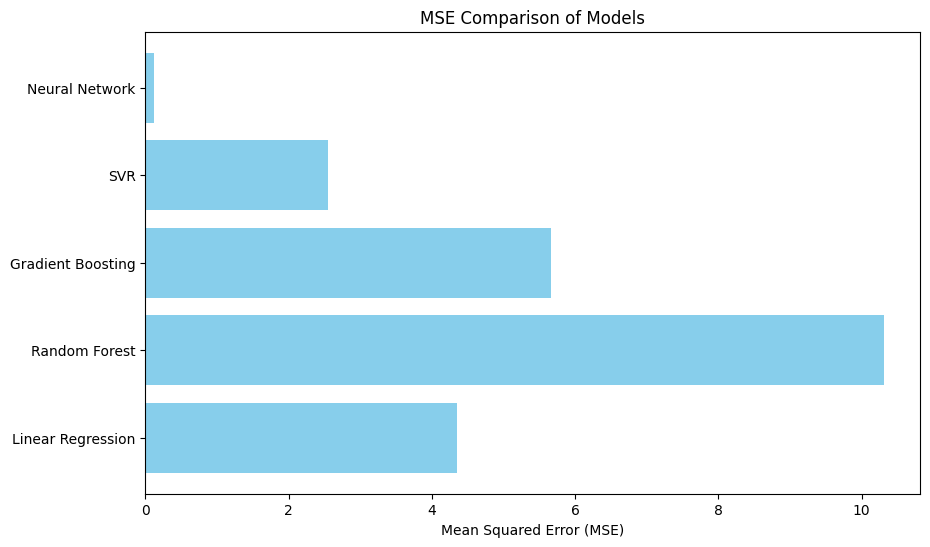

In [32]:
# MSE Comparison Bar Plot
mse_values = [model['MSE'] for model in model_comparisons.values()]
models = list(model_comparisons.keys())

plt.figure(figsize=(10, 6))
plt.barh(models, mse_values, color='skyblue')
plt.xlabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison of Models')
plt.show()


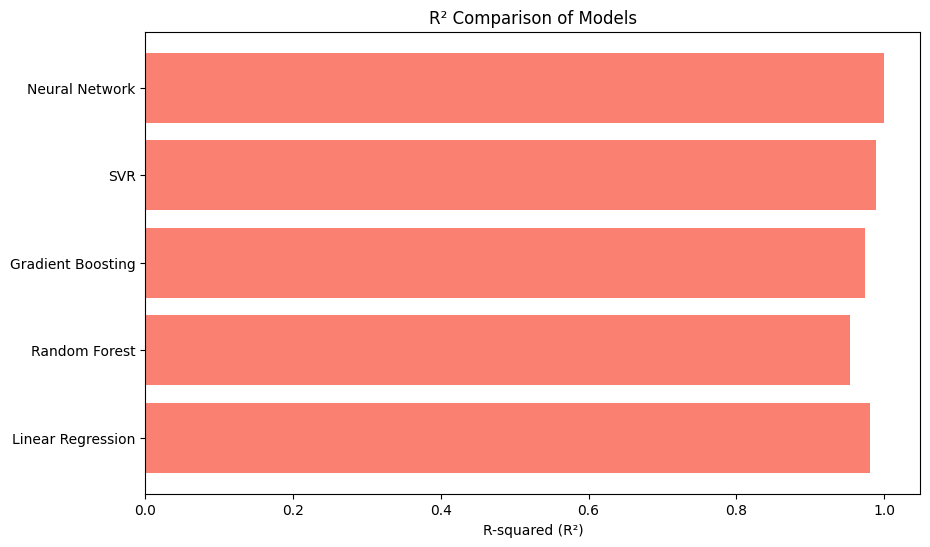

In [34]:
# R² Comparison Bar Plot
r2_values = [model['R²'] for model in model_comparisons.values()]

plt.figure(figsize=(10, 6))
plt.barh(models, r2_values, color='salmon')
plt.xlabel('R-squared (R²)')
plt.title('R² Comparison of Models')
plt.show()


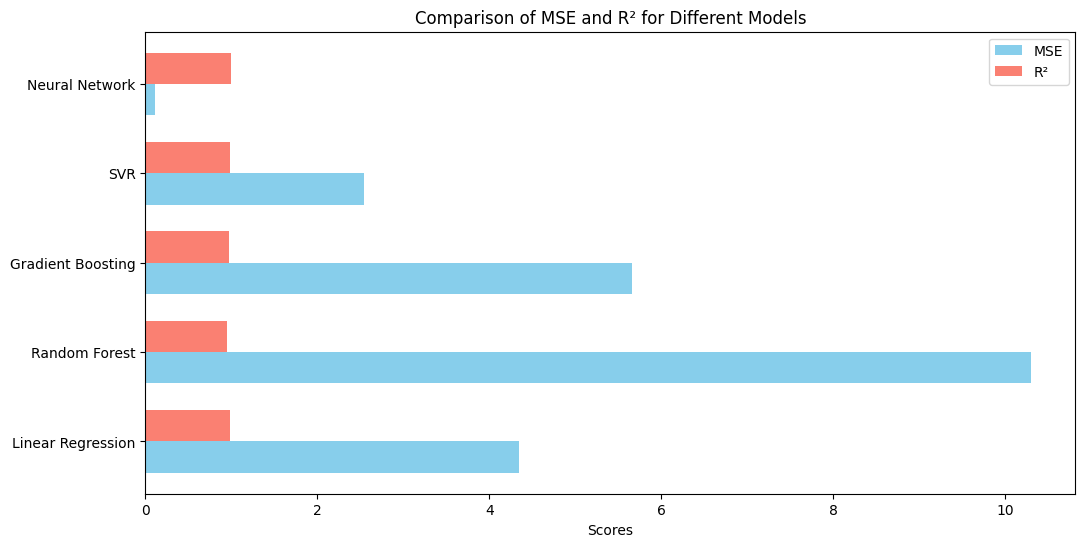

In [40]:
# Creating a grouped bar chart to compare MSE and R² for each model
fig, ax = plt.subplots(figsize=(12, 6))

# Create two bar plots, one for MSE and one for R²
bar_width = 0.35
index = np.arange(len(models))

bar1 = ax.barh(index, mse_values, bar_width, label='MSE', color='skyblue')
bar2 = ax.barh(index + bar_width, r2_values, bar_width, label='R²', color='salmon')

# Adding labels and title
ax.set_xlabel('Scores')
ax.set_title('Comparison of MSE and R² for Different Models')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(models)
ax.legend()

plt.show()


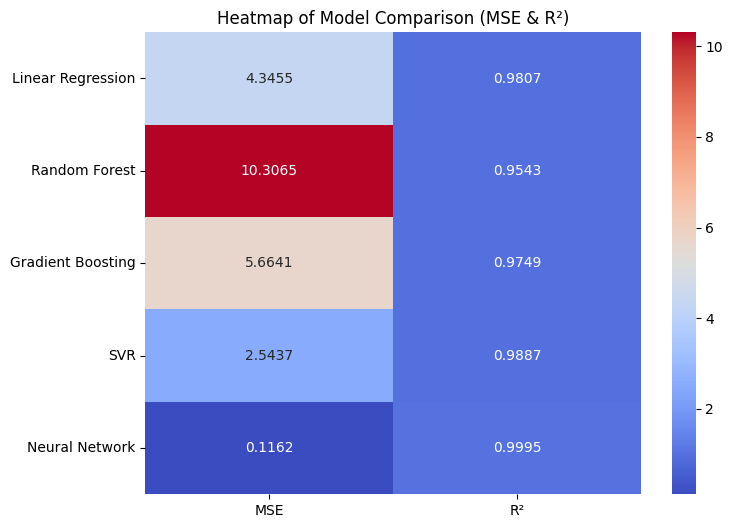

In [56]:
# Create a DataFrame from the comparison dictionary for heatmap
import pandas as pd

comparison_df = pd.DataFrame(model_comparisons).T
comparison_df = comparison_df[['MSE', 'R²']]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(comparison_df, annot=True, cmap="coolwarm", cbar=True, fmt=".4f")
plt.title('Heatmap of Model Comparison (MSE & R²)')
plt.show()
